# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd

In [2]:
# load messages dataset
messages = pd.read_csv('messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
# load categories dataset
categories = pd.read_csv('categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [4]:
# merge datasets
df = pd.merge(messages, categories, on='id')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [5]:
# create a dataframe of the 36 individual category columns

#categories = pd.DataFrame(columns=[w for w in range(36)])
#categories.head()

categories = df['categories'].str.split(';', expand=True) 

#pd.DataFrame(columns=[w for w in range(36)])
categories.head()  

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [6]:
# select the first row of the categories dataframe
row = df.categories[0]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = [colname[:-2] for colname in row.split(';')]

print (category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [7]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [8]:
categories = df['categories'].str.split(';', expand=True) 
row = df.categories[0]
category_colnames = [colname[:-2] for colname in row.split(';')]
categories.columns = category_colnames

for column in categories:
    # set each value to be the last character of the string
    categories[column].astype(str)
    categories[column] = categories[column].str[-1].astype(int)


In [9]:
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26386 entries, 0 to 26385
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   related                 26386 non-null  int32
 1   request                 26386 non-null  int32
 2   offer                   26386 non-null  int32
 3   aid_related             26386 non-null  int32
 4   medical_help            26386 non-null  int32
 5   medical_products        26386 non-null  int32
 6   search_and_rescue       26386 non-null  int32
 7   security                26386 non-null  int32
 8   military                26386 non-null  int32
 9   child_alone             26386 non-null  int32
 10  water                   26386 non-null  int32
 11  food                    26386 non-null  int32
 12  shelter                 26386 non-null  int32
 13  clothing                26386 non-null  int32
 14  money                   26386 non-null  int32
 15  missing_people     

### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [11]:
# drop the original categories column from `df`
df.drop(columns='categories', inplace = True)

df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [12]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis=1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [13]:
# check number of duplicates
df.duplicated().sum()

170

In [14]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [15]:
# check number of duplicates
df.duplicated().sum()

0

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [16]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///messages.db')
df.to_sql('messages', engine, index=False)

26216

In [37]:
conn = db.connect('messages2.db')
df.to_sql(name='messages', con=conn)
conn.close()

In [39]:
# Load database from file using 
import os
import sqlite3 as db
#../data/
#database_filepath = 'DisasterResponse.db'
database_filepath = '../data/messages2.db'
#database_filepath = 'messages2.db'

#path = os.path.dirname(os.path.realpath(__file__)) # directory path of the app
#con = db.connect(os.path.join(path, database_filepath))

con = db.connect(os.path.join(database_filepath))
#cur = engine.cursor()
df_loaded = pd.read_sql_query("SELECT * from messages", con)

#con = sqlite3.connect("data/portal_mammals.sqlite")


con.close()

df_loaded.head()

,index,id,message,original,genre,related,request,offer,aid_related,medical_help,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
con.close()

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.

<AxesSubplot:xlabel='genre'>

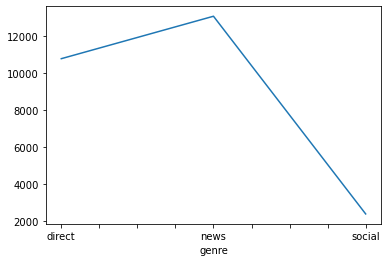

In [50]:
genre_counts = df.groupby('genre').count()['message']
genre_names = list(genre_counts.index)
genre_counts.plot()

In [56]:
type(genre_counts)


pandas.core.series.Series

In [57]:
genre_counts

genre
direct    10766
news      13054
social     2396
Name: message, dtype: int64

In [51]:
genre_names

['direct', 'news', 'social']

In [42]:
df.columns

Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'child_alone', 'water', 'food', 'shelter',
       'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

<AxesSubplot:xlabel='medical_help'>

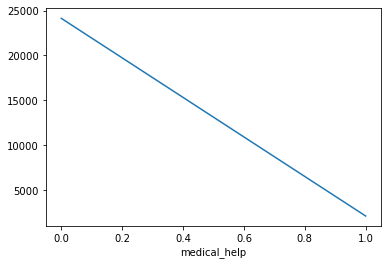

In [43]:
genre_counts = df.groupby('medical_help').count()['message']
genre_names = list(genre_counts.index)
genre_counts.plot()

In [45]:
df.groupby('water').count()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
water,,,,,,,,,,,,,,,,,,,,,
0,24544,24544,9379,24544,24544,24544,24544,24544,24544,24544,...,24544,24544,24544,24544,24544,24544,24544,24544,24544,24544
1,1672,1672,791,1672,1672,1672,1672,1672,1672,1672,...,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672


In [46]:
df.groupby('food').count()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
food,,,,,,,,,,,,,,,,,,,,,
0,23293,23293,8647,23293,23293,23293,23293,23293,23293,23293,...,23293,23293,23293,23293,23293,23293,23293,23293,23293,23293
1,2923,2923,1523,2923,2923,2923,2923,2923,2923,2923,...,2923,2923,2923,2923,2923,2923,2923,2923,2923,2923


In [75]:
df.groupby('clothing').count()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
clothing,,,,,,,,,,,,,,,,,,,,,
0,25811,25811,10070,25811,25811,25811,25811,25811,25811,25811,...,25811,25811,25811,25811,25811,25811,25811,25811,25811,25811
1,405,405,100,405,405,405,405,405,405,405,...,405,405,405,405,405,405,405,405,405,405


In [79]:
df2= df.groupby('clothing').count()

In [84]:
df2.iloc[0].id

25811

In [85]:
df.groupby('clothing').count().iloc[0].id

25811

In [80]:
df2[df2['clothing'] == 1]

KeyError: 'clothing'

In [73]:
df.groupby('medical_products').count().clothing

In [74]:
df.groupby('medical_products').count().id

medical_products
0    24903
1     1313
Name: id, dtype: int64

In [72]:
df2[df2['clothing'] == 0]

,id,message,original,genre,related,request,offer,aid_related,medical_help,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
medical_products,,,,,,,,,,,,,,,,,,,,,


In [93]:
data = {'water': df.groupby('water').count().iloc[1].id, 'food': df.groupby('food').count().iloc[1].id, 'clothing': df.groupby('clothing').count().iloc[1].id, 'medical_products': df.groupby('medical_products').count().iloc[1].id}
issues_names = ['water', 'food', 'clothing', 'medical_products']
ser = pd.Series(data=data, index=issues_names)
ser

water               1672
food                2923
clothing             405
medical_products    1313
dtype: int64

In [92]:
ser

water               1672
food                2923
clothing             405
medical_products    1313
dtype: int64

<AxesSubplot:>

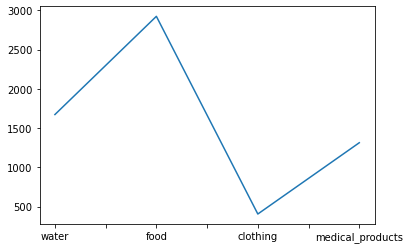

In [94]:
ser.plot()

In [96]:
data = {'transport': df.groupby('transport').count().iloc[1].id, 'buildings': df.groupby('buildings').count().iloc[1].id, 'electricity': df.groupby('electricity').count().iloc[1].id, 'hospitals': df.groupby('hospitals').count().iloc[1].id, 'aid_centers': df.groupby('aid_centers').count().iloc[1].id}
infraestructure_names = ['transport', 'buildings', 'electricity', 'hospitals', 'aid_centers']
ser = pd.Series(data=data, index=infraestructure_names)
ser

transport      1201
buildings      1333
electricity     532
hospitals       283
aid_centers     309
dtype: int64

<AxesSubplot:>

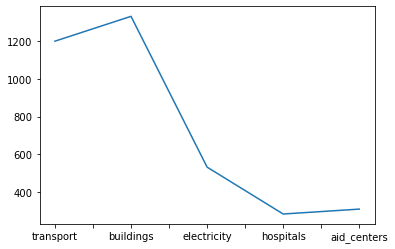

In [97]:
ser.plot()
    
    